<a href="https://colab.research.google.com/github/MayurPatil2711/SURE-IIT-Hyderabad/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
import matplotlib.lines as mlines

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = '/content/drive/MyDrive/IITH SURE/Same Diameter Data.xlsx'
aggregated_data = pd.read_excel(filepath, sheet_name='Aggregated_Data')
aggregated_data = aggregated_data.dropna(how="all")
aggregated_data = aggregated_data.fillna(method = "ffill")
aggregated_data.head()

,Radius of Cylinder (in mm),Gap Width Theoretical (in mm),Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm)
0,50.0,5.0,7.644,1.127,5.356,0.611
1,50.0,10.0,7.680,0.529,8.201,1.076
2,50.0,15.0,6.913,0.871,14.001,0.509
3,50.0,20.0,6.894,0.403,18.091,0.378
4,50.0,25.0,6.812,0.332,24.179,1.050


In [ ]:
mm_25_aggregated = aggregated_data[aggregated_data["Radius of Cylinder (in mm)"] == 25]
mm_50_aggregated = aggregated_data[aggregated_data["Radius of Cylinder (in mm)"] == 50]
mm_40_aggregated = aggregated_data[aggregated_data["Radius of Cylinder (in mm)"] == 40]

# D1 = D2 = 25 mm

In [ ]:
mm_25_data = pd.read_excel(filepath, sheet_name='Diameter_25mm')
mm_25_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' avg.,Bubble Behaviour,Jet's Direction,Mean Radius (in mm),Std. Deviation Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,20.0,20.087,0.1250,1.0,55.0,7.6667,7.173882,2.800018,2.801461,Jetting Towards Nearer Wall,Towards nearer solid wall with high velocity,6.861112,0.337745,18.274815,0.901416,NaN
1,NaN,19.220,NaN,2.0,52.0,7.5833,6.857173,2.802904,NaN,Jetting Towards Nearer Wall,Towards nearer solid wall with high velocity,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,19.043,0.0625,1.0,51.0,7.5750,6.732673,2.828446,2.843198,Split Collapse,Equal flow towards both walls,NaN,NaN,NaN,NaN,Larger volume of jet towards larger diameter c...
4,NaN,18.834,NaN,2.0,49.0,7.5750,6.468647,2.911583,NaN,Jetting Towards Nearer Wall,Towards nearer solid wall with medium velocity,NaN,NaN,NaN,NaN,NaN


In [ ]:
required_data_25 = mm_25_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Bubble Behaviour', "Max. Radius (in mm)"]]
required_data_25 = required_data_25.dropna(how='all')
required_data_25 = required_data_25.fillna(method='ffill')
required_data_25["b"] = required_data_25["Gap Width Experimental (in mm)"]*required_data_25['Offset from Centre']
required_data_25["b'"] = 2 * required_data_25["b"]/required_data_25["Gap Width Experimental (in mm)"]
required_data_25["Cylinder Radius"] = 12.5
required_data_25["s'"] = required_data_25["b"] / 12.5
required_data_25.head()

,Gap Width Experimental (in mm),Offset from Centre,W',Bubble Behaviour,Max. Radius (in mm),b,b',Cylinder Radius,s'
0,20.087,0.1250,2.800018,Jetting Towards Nearer Wall,7.173882,2.510875,0.250,12.5,0.200870
1,19.220,0.1250,2.802904,Jetting Towards Nearer Wall,6.857173,2.402500,0.250,12.5,0.192200
3,19.043,0.0625,2.828446,Split Collapse,6.732673,1.190187,0.125,12.5,0.095215
4,18.834,0.0625,2.911583,Jetting Towards Nearer Wall,6.468647,1.177125,0.125,12.5,0.094170
5,18.717,0.0625,2.789567,Jetting Towards Nearer Wall,6.709643,1.169812,0.125,12.5,0.093585


In [ ]:
mm_25_spherical_collapse = required_data_25[required_data_25['Bubble Behaviour'] == 'Spherical Collapse']
mm_25_spherical_collapse = mm_25_spherical_collapse.sort_values(by = "W'", ascending=1)

mm_25_jetting_towards = required_data_25[required_data_25['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']
mm_25_jetting_towards = mm_25_jetting_towards.sort_values(by = "W'", ascending=0).iloc[2:, :]

mm_25_jetting_away = required_data_25[required_data_25['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']
mm_25_jetting_away = mm_25_jetting_away.sort_values(by = "W'", ascending=0)

mm_25_split_collapse = required_data_25[required_data_25['Bubble Behaviour'] == 'Split Collapse']
mm_25_split_collapse = mm_25_split_collapse.sort_values(by = "W'", ascending=0)

mm_25_centre_collapse = required_data_25[required_data_25['Bubble Behaviour'] == 'Centre Collapse']
mm_25_centre_collapse = mm_25_centre_collapse.sort_values(by = "W'", ascending=0)

In [ ]:
min_W_dash_25 = np.array([min(mm_25_jetting_towards["W'"]), min(mm_25_spherical_collapse["W'"]), min(mm_25_split_collapse["W'"]), min(mm_25_jetting_away["W'"]), min(mm_25_centre_collapse["W'"]), np.NaN])
max_W_dash_25 = np.array([max(mm_25_jetting_towards["W'"]), max(mm_25_spherical_collapse["W'"]), max(mm_25_split_collapse["W'"]), max(mm_25_jetting_away["W'"]), max(mm_25_centre_collapse["W'"]), np.NaN])

# D1 = D2 = 40 mm

In [ ]:
mm_40_data = pd.read_excel(filepath, sheet_name='Diameter_40mm')
mm_40_data.rename(columns = {"Offset ratio":"Offset from Centre", "Max Radius (in mm)":"Max. Radius (in mm)"}, inplace = True)
mm_40_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Conversion Factor (in pixels/mm),Max Radius (in pixels),Max. Radius (in mm),W',W'_Avg,Bubble Behaviour,Jet Direction,Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,45.0,43.280,0.250,1.0,NaN,NaN,6.811,6.354427,6.185567,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,6.727051,0.741206,47.083948,2.082903,NaN
1,NaN,43.086,NaN,2.0,NaN,NaN,7.280,5.918407,NaN,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,NaN,NaN,NaN,NaN,NaN
2,NaN,45.690,NaN,3.0,NaN,NaN,7.271,6.283867,NaN,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,47.231,0.125,1.0,NaN,NaN,7.474,6.319374,6.751023,Spherical Collapse,No flow towards Solid Wall,NaN,NaN,NaN,NaN,Significant amount of small bubble like struct...


In [ ]:
required_data_40 = mm_40_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Bubble Behaviour', "Max. Radius (in mm)"]]
required_data_40 = required_data_40.dropna(how='all')
required_data_40 = required_data_40.fillna(method='ffill')
required_data_40["Cylinder Radius"] = 20
required_data_40["b"] = required_data_40["Gap Width Experimental (in mm)"]*required_data_40['Offset from Centre']
required_data_40["b'"] = 2 * required_data_40["b"]/required_data_40["Gap Width Experimental (in mm)"]
required_data_40["s'"] = required_data_40["b"] / 20
required_data_40.head()

,Gap Width Experimental (in mm),Offset from Centre,W',Bubble Behaviour,Max. Radius (in mm),Cylinder Radius,b,b',s'
0,43.280,0.250,6.354427,Jetting Towards Nearer Wall,6.811,20,10.820000,0.50,0.541000
1,43.086,0.250,5.918407,Jetting Towards Nearer Wall,7.280,20,10.771500,0.50,0.538575
2,45.690,0.250,6.283867,Jetting Towards Nearer Wall,7.271,20,11.422500,0.50,0.571125
4,47.231,0.125,6.319374,Spherical Collapse,7.474,20,5.903875,0.25,0.295194
5,46.108,0.125,6.779591,Spherical Collapse,6.801,20,5.763500,0.25,0.288175


In [ ]:
mm_40_spherical_collapse = (required_data_40[required_data_40['Bubble Behaviour'] == 'Spherical Collapse']).sort_values(by = "W'", ascending = 0).iloc[1:, :]
mm_40_centre_collapse = (required_data_40[required_data_40['Bubble Behaviour'] == 'Centre Collapse']).sort_values(by = "W'", ascending = 0)
mm_40_split_after_collapse = (required_data_40[required_data_40['Bubble Behaviour'] == 'Split After Collapse']).sort_values(by = "W'", ascending = 0)
mm_40_split_collapse = (required_data_40[required_data_40['Bubble Behaviour'] == 'Split Collapse']).sort_values(by = "W'", ascending = 0)
mm_40_jetting_towards = (required_data_40[required_data_40['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']).sort_values(by = "W'", ascending = 0)
mm_40_jetting_away = (required_data_40[required_data_40['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']).sort_values(by = "W'", ascending = 0)

In [ ]:
min_W_dash_40 = np.array([min(mm_40_jetting_towards["W'"]), min(mm_40_spherical_collapse["W'"]), min(mm_40_split_collapse["W'"]), min(mm_40_jetting_away["W'"]), min(mm_40_centre_collapse["W'"]), min(mm_40_split_after_collapse["W'"])])
max_W_dash_40 = np.array([max(mm_40_jetting_towards["W'"]), max(mm_40_spherical_collapse["W'"]), max(mm_40_split_collapse["W'"]), max(mm_40_jetting_away["W'"]), max(mm_40_centre_collapse["W'"]), max(mm_40_split_after_collapse["W'"])])

# D1 = D2 = 50 mm

In [ ]:
mm_50_data = pd.read_excel(filepath, sheet_name='Diameter_50mm')
mm_50_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' Avg.,Bubble Behaviour,Jet_Direction,Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,25.0,24.514,0.06250,1.0,57.0,8.3014,6.866312,3.570185,3.518056,Split After Collapse,Towards nearer wall with low velocity,6.811829,0.331887,24.179226,1.049858,"Dumpbell-like shape, larger volume towards nea..."
1,NaN,24.828,NaN,2.0,59.0,8.2167,7.180498,3.457699,NaN,Split After Collapse,Towards nearer wall with low velocity,NaN,NaN,NaN,NaN,"Dumpbell-like shape, larger volume towards nea..."
2,NaN,24.562,NaN,3.0,57.0,8.1833,6.965405,3.526284,NaN,Split After Collapse,Towards nearer wall with low velocity,NaN,NaN,NaN,NaN,"Dumpbell-like shape, larger volume towards nea..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,26.574,0.03125,1.0,52.0,7.6015,6.840755,3.884659,3.645259,Spherical Collapse,Towards nearer solid wall with low velocity,NaN,NaN,NaN,NaN,NaN


In [ ]:
required_data_50 = mm_50_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Bubble Behaviour', "Max. Radius (in mm)"]]
required_data_50 = required_data_50.dropna(how='all')
required_data_50 = required_data_50.fillna(method='ffill')
required_data_50["Cylinder Radius"] = 25
required_data_50["b"] = required_data_50["Gap Width Experimental (in mm)"] * required_data_50['Offset from Centre']
required_data_50["b'"] = 2 * required_data_50["b"] / required_data_50["Gap Width Experimental (in mm)"]
required_data_50["s'"] = required_data_50["b"] / 25
required_data_50.head()

,Gap Width Experimental (in mm),Offset from Centre,W',Bubble Behaviour,Max. Radius (in mm),Cylinder Radius,b,b',s'
0,24.514,0.06250,3.570185,Split After Collapse,6.866312,25,1.532125,0.1250,0.061285
1,24.828,0.06250,3.457699,Split After Collapse,7.180498,25,1.551750,0.1250,0.062070
2,24.562,0.06250,3.526284,Split After Collapse,6.965405,25,1.535125,0.1250,0.061405
4,26.574,0.03125,3.884659,Spherical Collapse,6.840755,25,0.830438,0.0625,0.033218
5,24.106,0.03125,3.568633,Spherical Collapse,6.754967,25,0.753313,0.0625,0.030133


In [ ]:
mm_50_spherical_collapse = (required_data_50[required_data_50['Bubble Behaviour'] == 'Spherical Collapse']).sort_values(by = "W'", ascending = 1).iloc[3:, :]
mm_50_split_after_collapse = (required_data_50[required_data_50['Bubble Behaviour'] == 'Split After Collapse']).sort_values(by = "W'", ascending = 0)
mm_50_split_collapse = (required_data_50[required_data_50['Bubble Behaviour'] == 'Split Collapse']).sort_values(by = "W'", ascending = 0)
mm_50_jetting_towards = (required_data_50[required_data_50['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']).sort_values(by = "W'", ascending = 1)
mm_50_jetting_away = (required_data_50[required_data_50['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']).sort_values(by = "W'", ascending = 0)

In [ ]:
min_W_dash_50 = np.array([min(mm_50_jetting_towards["W'"]), min(mm_50_spherical_collapse["W'"]), min(mm_50_split_collapse["W'"]), min(mm_50_jetting_away["W'"]), np.NaN, min(mm_50_split_after_collapse["W'"])])
max_W_dash_50 = np.array([max(mm_50_jetting_towards["W'"]), max(mm_50_spherical_collapse["W'"]), max(mm_50_split_collapse["W'"]), max(mm_50_jetting_away["W'"]), np.NaN, max(mm_50_split_after_collapse["W'"])])

# Combining All Data

In [ ]:
all_data = pd.concat([required_data_50, required_data_40, required_data_25])

# Removing Outliers

In [ ]:
spherical_collapse = (all_data[all_data["Bubble Behaviour"] == "Spherical Collapse"].sort_values(by = "s'", ascending  = 0).iloc[3:, :]).sort_values("W'", ascending = 0).iloc[3:-8, :]
split_collapse = (all_data[all_data["Bubble Behaviour"] == "Split Collapse"].sort_values(by = "s'", ascending  = 0).iloc[1:, :]).sort_values("W'", ascending = 0).iloc[4:, :]
jetting_towards = all_data[all_data["Bubble Behaviour"] == "Jetting Towards Nearer Wall"].sort_values(by = "W'", ascending  =1).iloc[1:, :]
jetting_towards = jetting_towards.drop([69, 67, 68, 54, 52, 53])
jetting_away = all_data[all_data["Bubble Behaviour"] == "Jetting Away From Nearer Wall"].sort_values(by = "W'", ascending  = 0).iloc[1:, :]
split_after_collapse = (all_data[all_data["Bubble Behaviour"] == "Split After Collapse"].sort_values(by = "W'", ascending  = 1).iloc[3:, :]).sort_values("s'", ascending = 0).iloc[1:, :]
centre_collapse = all_data[all_data["Bubble Behaviour"] == "Centre Collapse"].sort_values(by = "W'", ascending  = 1)

In [31]:
all_data = pd.concat([spherical_collapse, split_collapse, jetting_towards, jetting_away, split_after_collapse, centre_collapse])
all_data.head()

,Gap Width Experimental (in mm),Offset from Centre,W',Bubble Behaviour,Max. Radius (in mm),Cylinder Radius,b,b',s'
79,45.544,0.03125,7.911195,Spherical Collapse,5.756905,25.0,1.423250,0.0625,0.056930
51,38.742,0.12500,7.897408,Spherical Collapse,4.905660,25.0,4.842750,0.2500,0.193710
59,39.245,0.18750,7.255762,Spherical Collapse,5.408805,25.0,7.358437,0.3750,0.294337
14,48.841,0.06250,7.216460,Spherical Collapse,6.768000,20.0,3.052563,0.1250,0.152628
56,38.831,0.06250,7.209291,Spherical Collapse,5.386244,25.0,2.426938,0.1250,0.097078


In [ ]:
W_dash_greater_4 = all_data[all_data["W'"]>4.02]
W_dash_greater_16_less_356 = all_data[(all_data["W'"]>1.6) & (all_data["W'"]<3.56)]
W_dash_less_16 = all_data[all_data["W'"]<1.4]

In [ ]:
jetting_towards1 = W_dash_greater_4[W_dash_greater_4["Bubble Behaviour"] == "Jetting Towards Nearer Wall"]
spherical1 = W_dash_greater_4[W_dash_greater_4["Bubble Behaviour"] == "Spherical Collapse"]

jetting_towards2 = W_dash_greater_16_less_356[W_dash_greater_16_less_356["Bubble Behaviour"] == "Jetting Towards Nearer Wall"]
split2 = W_dash_greater_16_less_356[W_dash_greater_16_less_356["Bubble Behaviour"] == "Split Collapse"]
split_after2 = W_dash_greater_16_less_356[W_dash_greater_16_less_356["Bubble Behaviour"] == "Split After Collapse"]

jetting_away3 = W_dash_less_16[W_dash_less_16["Bubble Behaviour"] == "Jetting Away From Nearer Wall"]
split3 = W_dash_less_16[W_dash_less_16["Bubble Behaviour"] == "Split Collapse"]
centre3 = W_dash_less_16[W_dash_less_16["Bubble Behaviour"] == "Centre Collapse"]

In [ ]:
min_s_dash_1 = np.array([min(jetting_towards1["s'"]), min(spherical1["s'"]), np.NaN, np.NaN, np.NaN, np.NaN])
max_s_dash_1 = np.array([max(jetting_towards1["s'"]), max(spherical1["s'"]), np.NaN, np.NaN, np.NaN, np.NaN])

min_s_dash_2 = np.array([min(jetting_towards2["s'"]), np.NaN, min(split2["s'"]), np.NaN, np.NaN, min(split_after2["s'"])])
max_s_dash_2 = np.array([max(jetting_towards2["s'"]), np.NaN, max(split2["s'"]), np.NaN, np.NaN, max(split_after2["s'"])])

min_s_dash_3 = np.array([np.NaN, np.NaN, min(split3["s'"]), min(jetting_away3["s'"]), min(centre3["s'"]), np.NaN])
max_s_dash_3 = np.array([np.NaN, np.NaN, max(split3["s'"]), max(jetting_away3["s'"]), max(centre3["s'"]), np.NaN])

In [32]:
s_dash_greater_045 = all_data[all_data["s'"] > 0.46]
s_dash_greater_02_less_045 = all_data[(all_data["s'"] < 0.46) & (all_data["s'"] > 0.21)]
s_dash_greater_072_less_021 = all_data[(all_data["s'"] < 0.21) & (all_data["s'"] > 0.055)]
s_dash_less_0011 = all_data[all_data["s'"] < 0.055]

In [ ]:
jetting_towards4 = s_dash_greater_045[s_dash_greater_045["Bubble Behaviour"] == "Jetting Towards Nearer Wall"]

jetting_towards5 = s_dash_greater_02_less_045[s_dash_greater_02_less_045["Bubble Behaviour"] == "Jetting Towards Nearer Wall"]
spherical5 = s_dash_greater_02_less_045[s_dash_greater_02_less_045["Bubble Behaviour"] == "Spherical Collapse"]

jetting_towards6 = s_dash_greater_072_less_021[s_dash_greater_072_less_021["Bubble Behaviour"] == "Jetting Towards Nearer Wall"]
spherical6 = s_dash_greater_072_less_021[s_dash_greater_072_less_021["Bubble Behaviour"] == "Spherical Collapse"]
jetting_away6 = s_dash_greater_072_less_021[s_dash_greater_072_less_021["Bubble Behaviour"] == "Jetting Away From Nearer Wall"]
split6 = s_dash_greater_072_less_021[s_dash_greater_072_less_021["Bubble Behaviour"] == "Split Collapse"]

jetting_towards7 = s_dash_less_0011[s_dash_less_0011["Bubble Behaviour"] == "Jetting Towards Nearer Wall"]
spherical7 = s_dash_less_0011[s_dash_less_0011["Bubble Behaviour"] == "Spherical Collapse"]
jetting_away7 = s_dash_less_0011[s_dash_less_0011["Bubble Behaviour"] == "Jetting Away From Nearer Wall"]
split7 = s_dash_less_0011[s_dash_less_0011["Bubble Behaviour"] == "Split Collapse"]
split_after7 = s_dash_less_0011[s_dash_less_0011["Bubble Behaviour"] == "Split After Collapse"]
centre7 = s_dash_less_0011[s_dash_less_0011["Bubble Behaviour"] == "Centre Collapse"]

In [ ]:
min_W_dash_1 = np.array([min(jetting_towards4["W'"]), np.NaN, np.NaN, np.NaN, np.NaN, np.NaN])
max_W_dash_1 = np.array([max(jetting_towards4["W'"]), np.NaN, np.NaN, np.NaN, np.NaN, np.NaN])

min_W_dash_2 = np.array([min(jetting_towards5["W'"]), min(spherical5["W'"]), np.NaN, np.NaN, np.NaN, np.NaN])
max_W_dash_2 = np.array([max(jetting_towards5["W'"]), max(spherical5["W'"]), np.NaN, np.NaN, np.NaN, np.NaN])

min_W_dash_3 = np.array([min(jetting_towards6["W'"]), min(spherical6["W'"]), min(split6["W'"]), min(jetting_away6["W'"]), np.NaN, np.NaN])
max_W_dash_3 = np.array([max(jetting_towards6["W'"]), max(spherical6["W'"]), max(split6["W'"]), max(jetting_away6["W'"]), np.NaN, np.NaN])

min_W_dash_4 = np.array([min(jetting_towards7["W'"]), min(spherical7["W'"]), min(split7["W'"]), min(jetting_away7["W'"]), min(centre7["W'"]), min(split_after7["W'"])])
max_W_dash_4 = np.array([max(jetting_towards7["W'"]), max(spherical7["W'"]), max(split7["W'"]), max(jetting_away7["W'"]), max(centre7["W'"]), max(split_after7["W'"])])

<ipython-input-26-0b773962297f>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


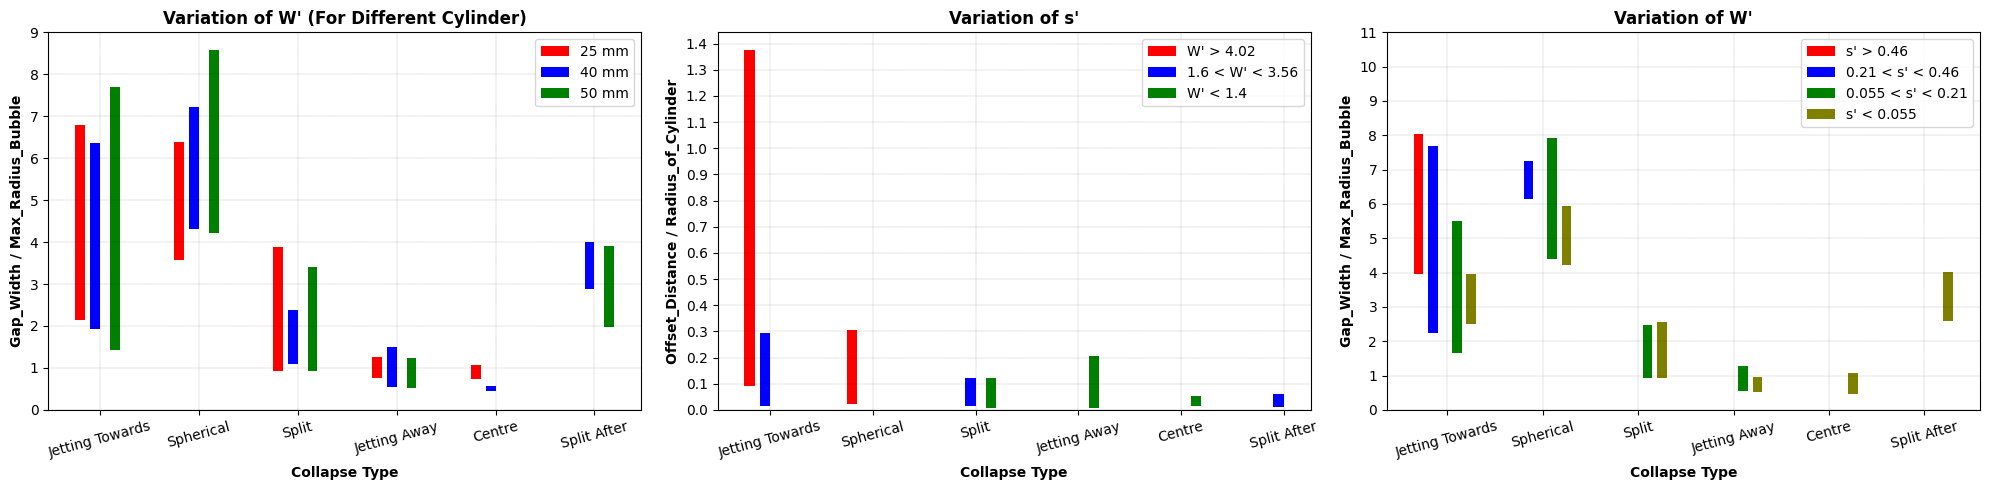

In [ ]:
plt.subplots(figsize=(20, 5))

x = ["Jetting Towards", 'Spherical', 'Split', 'Jetting Away',  'Centre', 'Split After']
x_axis = np.arange(len(x))

#Plot for W'
plt.subplot(1, 3, 1)
plt.bar(x_axis-0.2, max_W_dash_25-min_W_dash_25, 0.1, bottom = min_W_dash_25, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_W_dash_40-min_W_dash_40, 0.1, bottom = min_W_dash_40, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_W_dash_50-min_W_dash_50, 0.1, bottom = min_W_dash_50, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 15), plt.yticks(np.linspace(0, 9, 10))
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("Gap_Width / Max_Radius_Bubble", fontweight = 'bold')
plt.legend(), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title("Variation of W' (For Different Cylinder)",fontweight = 'bold')

#Plot for s'
plt.subplot(1, 3, 2)
plt.bar(x_axis-0.2, max_s_dash_1-min_s_dash_1, 0.1, bottom = min_s_dash_1, color = "red", label = "W' > 4.02")
plt.bar(x_axis-0.05, max_s_dash_2-min_s_dash_2, 0.1, bottom = min_s_dash_2, color = "blue", label = "1.6 < W' < 3.56")
plt.bar(x_axis+0.15, max_s_dash_3-min_s_dash_3, 0.1, bottom = min_s_dash_3, color = "green", label = "W' < 1.4")
plt.xticks(x_axis, x, rotation = 15), plt.yticks(np.linspace(0, 1.4, 15))
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("Offset_Distance / Radius_of_Cylinder", fontweight = 'bold')
plt.legend(), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title("Variation of s'",fontweight = 'bold')

#Plot for W' wrt s'
plt.subplot(1, 3, 3)
plt.bar(x_axis-0.3, max_W_dash_1-min_W_dash_1, 0.1, bottom = min_W_dash_1, color = "red", label = "s' > 0.46")
plt.bar(x_axis-0.15, max_W_dash_2-min_W_dash_2, 0.1, bottom = min_W_dash_2, color = "blue", label = "0.21 < s' < 0.46")
plt.bar(x_axis+0.1, max_W_dash_3-min_W_dash_3, 0.1, bottom = min_W_dash_3, color = "green", label = "0.055 < s' < 0.21")
plt.bar(x_axis+0.25, max_W_dash_4-min_W_dash_4, 0.1, bottom = min_W_dash_4, color = "olive", label = "s' < 0.055")
plt.xticks(x_axis, x, rotation = 15), plt.yticks(np.linspace(0, 11, 12))
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("Gap_Width / Max_Radius_Bubble", fontweight = 'bold')
plt.legend(), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title("Variation of W'",fontweight = 'bold')
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/Variation of W' (s')")

plt.tight_layout()
plt.show()

# Mean & Std. Deviation Plot

In [ ]:
mean1 = (all_data[all_data["Gap Width Experimental (in mm)"] > 43]["Max. Radius (in mm)"]).mean()
std1 = (all_data[all_data["Gap Width Experimental (in mm)"] > 43]["Max. Radius (in mm)"]).std()

mean2 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 38) & (all_data["Gap Width Experimental (in mm)"] < 43)]["Max. Radius (in mm)"]).mean()
std2 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 38) & (all_data["Gap Width Experimental (in mm)"] < 43)]["Max. Radius (in mm)"]).std()

mean3 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 33) & (all_data["Gap Width Experimental (in mm)"] < 38)]["Max. Radius (in mm)"]).mean()
std3 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 33) & (all_data["Gap Width Experimental (in mm)"] < 38)]["Max. Radius (in mm)"]).std()

mean4 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 27) & (all_data["Gap Width Experimental (in mm)"] < 33)]["Max. Radius (in mm)"]).mean()
std4 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 27) & (all_data["Gap Width Experimental (in mm)"] < 33)]["Max. Radius (in mm)"]).std()

mean5 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 23) & (all_data["Gap Width Experimental (in mm)"] < 27)]["Max. Radius (in mm)"]).mean()
std5 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 23) & (all_data["Gap Width Experimental (in mm)"] < 27)]["Max. Radius (in mm)"]).std()

mean6 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 17) & (all_data["Gap Width Experimental (in mm)"] < 23)]["Max. Radius (in mm)"]).mean()
std6 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 17) & (all_data["Gap Width Experimental (in mm)"] < 23)]["Max. Radius (in mm)"]).std()

mean7 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 13) & (all_data["Gap Width Experimental (in mm)"] < 17)]["Max. Radius (in mm)"]).mean()
std7 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 13) & (all_data["Gap Width Experimental (in mm)"] < 17)]["Max. Radius (in mm)"]).std()

mean8 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 8) & (all_data["Gap Width Experimental (in mm)"] < 13)]["Max. Radius (in mm)"]).mean()
std8 = (all_data[(all_data["Gap Width Experimental (in mm)"] > 8) & (all_data["Gap Width Experimental (in mm)"] < 13)]["Max. Radius (in mm)"]).std()

mean9 = (all_data[all_data["Gap Width Experimental (in mm)"] < 8]["Max. Radius (in mm)"]).mean()
std9 = (all_data[all_data["Gap Width Experimental (in mm)"] < 8]["Max. Radius (in mm)"]).std()

In [ ]:
x = np.linspace(45, 5, 9, dtype = "int64")
y = np.array([mean1, mean2, mean3, mean4, mean5, mean6, mean7, mean8, mean9])
y_error = np.array([std1, std2, std3, std4, std5, std6, std7, std8, std9])

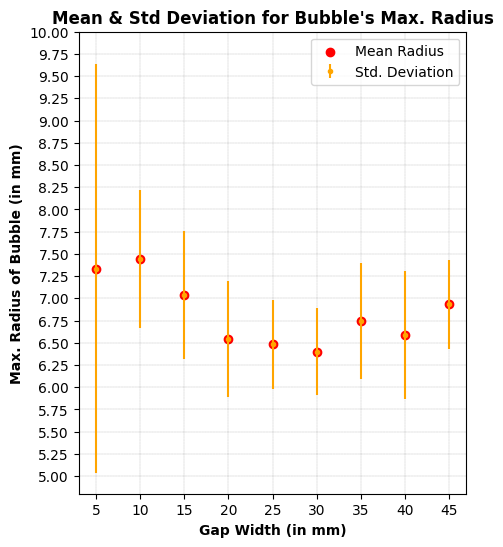

In [33]:
plt.figure(figsize = (5, 6))

plt.scatter(x, y, color = "red", label = "Mean Radius")
plt.errorbar(x, y, yerr = y_error, fmt = ".", color = "orange", label = "Std. Deviation")
plt.yticks(np.linspace(5, 10, 21)), plt.grid(color = 'black', linestyle = '--', linewidth = 0.1)
plt.legend(), plt.title("Mean & Std Deviation for Bubble's Max. Radius", fontweight = "bold")
plt.ylabel("Max. Radius of Bubble (in mm)", fontweight = "bold"), plt.xlabel("Gap Width (in mm)", fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/Mean & Std. Deviation.png")
plt.show()

# Final Plot

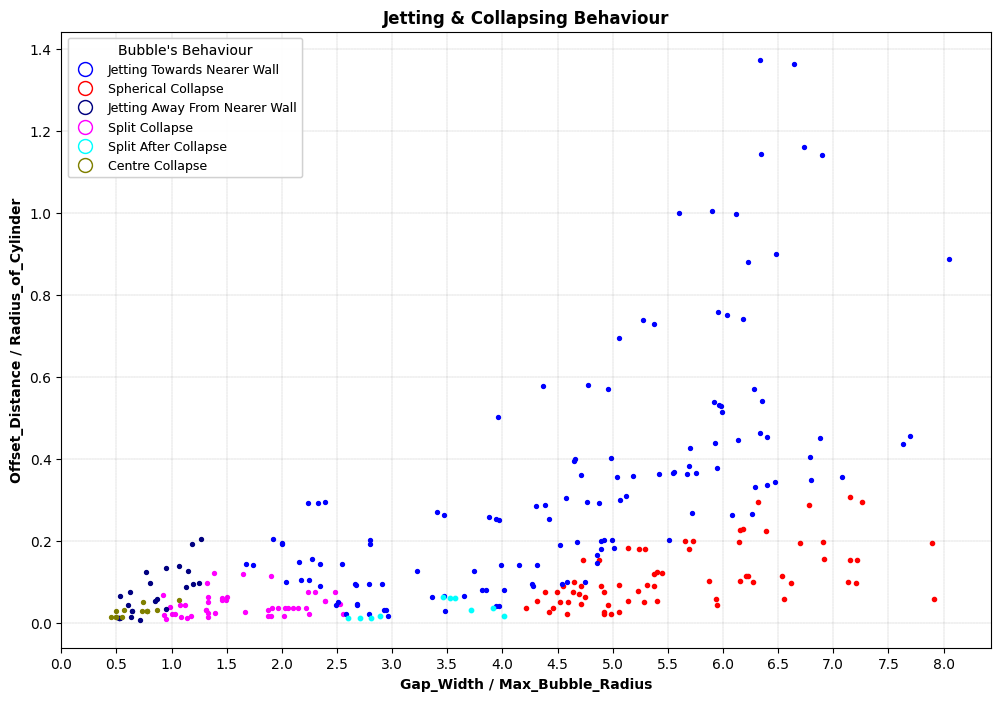

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(spherical_collapse["W'"], spherical_collapse["s'"], color = "red", s = 9)
plt.scatter(split_collapse["W'"], split_collapse["s'"], color = "magenta", s = 8)
plt.scatter(jetting_towards["W'"], jetting_towards["s'"], color = "blue", s = 8)
plt.scatter(jetting_away["W'"], jetting_away["s'"], color = "navy", s = 8)
plt.scatter(split_after_collapse["W'"], split_after_collapse["s'"], color = "cyan", s = 10)
plt.scatter(centre_collapse["W'"], centre_collapse["s'"], color = "olive", s = 8)

plt.xlabel("Gap_Width / Max_Bubble_Radius", fontweight = "bold"), plt.ylabel("Offset_Distance / Radius_of_Cylinder", fontweight = "bold")
plt.title("Jetting & Collapsing Behaviour", fontweight = "bold"), plt.xticks(np.linspace(0, 8, 17))

colors = {'blue': 'Jetting Towards Nearer Wall', 'red': 'Spherical Collapse', 'navy': 'Jetting Away From Nearer Wall', 'fuchsia': 'Split Collapse', 'cyan': 'Split After Collapse', 'olive': 'Centre Collapse'}
color_handles = [Line2D([0], [0], marker='o', color='w', markeredgecolor=color, markerfacecolor='none', markersize=10, label=label) for color, label in colors.items()]
legend1 = plt.legend(handles=color_handles, title="Bubble's Behaviour", fontsize=9, loc='upper left')
plt.gca().add_artist(legend1)

plt.grid(True, color='black', linestyle='--', linewidth=0.1)
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/Final Plot.png")
plt.show()